# ECS 171 Final Project
#### Pengcheng Cao, Zahira Ghazali, Denise Kwong, Sophie Mi, Lingfeng Pan, Zihan Wang

## Data Exploration

In [132]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Preprocessing

In [134]:
# Preprocessing
df.gender = df.gender == 'male'
df.lunch = df.lunch == 'standard'
df['test preparation course'] = df['test preparation course'] == 'completed'
# Group A - White - British
# Group B - White - Irish
# Group C - White - Any other White background
# Group D - Mixed - White and Black Caribbean
# Group E - Mixed - White and Black African
# Group F - Mixed - White and Asian
# Group G - Mixed - Any other mixed background
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4, 'group F': 5, 'group G': 6})

# some high school
# high school
# some college
# associate's degree
# bachelor's degree
# master's degree
df['parental level of education'] = df['parental level of education'].map({'some high school': 0, 
                                    'high school': 1, "some college": 2, "associate's degree": 3, 
                                    "bachelor's degree": 4, "master's degree": 5})

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,1,4,True,False,72,72,74
1,False,2,2,True,True,69,90,88
2,False,1,5,True,False,90,95,93
3,True,0,3,False,False,47,57,44
4,True,2,2,True,False,76,78,75
...,...,...,...,...,...,...,...,...
995,False,4,5,True,True,88,99,95
996,True,2,1,False,False,62,55,55
997,False,2,1,False,True,59,71,65
998,False,3,2,True,True,68,78,77


## Plots

In [135]:
import seaborn as sns
# Plotting scatter plots
sns.pairplot(df)

<AxesSubplot: >

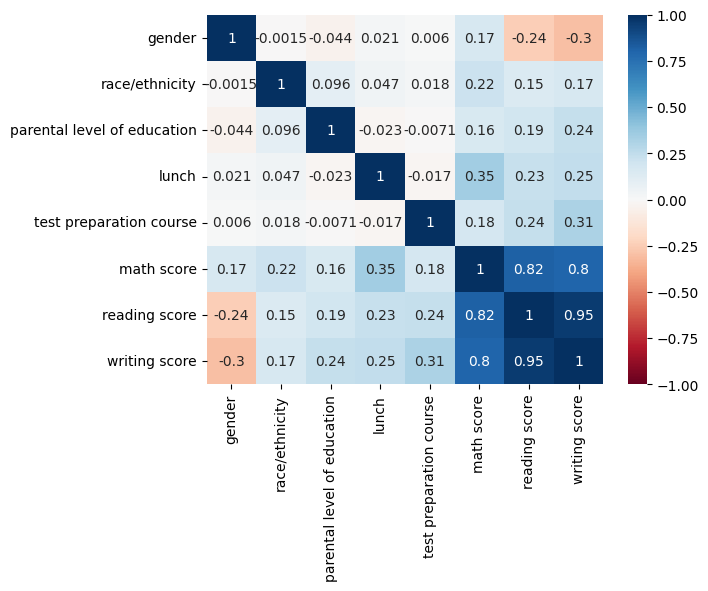

In [ ]:
# displaying correlation
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

## Target

- ```avg score```: the average of math, reading, and writing scores of the student
- ```passed```: a binary classifier that is ```true``` if the ```avg score``` is higher than 75

In [ ]:
import numpy as np
df['avg score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = df['avg score'] >= 75
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score,passed
0,False,1,4,True,False,72,72,74,72.666667,False
1,False,2,2,True,True,69,90,88,82.333333,True
2,False,1,5,True,False,90,95,93,92.666667,True
3,True,0,3,False,False,47,57,44,49.333333,False
4,True,2,2,True,False,76,78,75,76.333333,True
...,...,...,...,...,...,...,...,...,...,...
995,False,4,5,True,True,88,99,95,94.000000,True
996,True,2,1,False,False,62,55,55,57.333333,False
997,False,2,1,False,True,59,71,65,65.000000,False
998,False,3,2,True,True,68,78,77,74.333333,False


## First Model: Naive Bayes (Categorical and Gaussian)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# the target attribute is 'passed'
X = df.drop(['passed'], axis=1)
y = df['passed']

# categorical attributes: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
# numerical attributes: ['math score', 'reading score', 'writing score']
X_cat = X[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
X_num = X[['math score', 'reading score', 'writing score']]

# scale numerical data
scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num))

# split the data into training and testing set with the ratio 80:20
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size = 0.20, stratify=y, random_state=5)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size = 0.20, stratify=y, random_state=5)

In [ ]:
#CATEGORICAL 
model_cat = CategoricalNB()
cat = model_cat.fit(X_train_cat, y_train_cat)

# Predict class labels on test data
yhat_test_cat = cat.predict(X_test_cat)

# class labels known to the classifier
print('Classes: ', cat.classes_)

# log prior probability of each class.
print('Class Log Priors: ',cat.class_log_prior_)

score_cat = model_cat.score(X_test_cat, y_test_cat)
print(f'Accuracy Score: {score_cat * 100}%')

Classes:  [False  True]
Class Log Priors:  [-0.39119245 -1.12778367]
Accuracy Score: 68.0%


In [ ]:
# GAUSSIAN
model_gaus = GaussianNB()
gaus = model_gaus.fit(X_train_num, y_train_num)

# Predict class labels on test data
yhat_test_num = gaus.predict(X_test_num)

# class labels known to the classifier
print('Classes: ', gaus.classes_)

# prior probability of each class.
print('Class Priors: ',gaus.class_prior_)

score_num = model_gaus.score(X_test_num, y_test_num)
print(f'Accuracy Score: {score_num * 100}%')

Classes:  [False  True]
Class Priors:  [0.67625 0.32375]
Accuracy Score: 97.5%


## Compare Training and Testing Error

In [ ]:
# CATEGORICAL
# report the testing result using a classification report
print('testing classification report - categorical')
print(classification_report(y_test_cat, yhat_test_cat))
# report the training result using a classification report
print('training classification report - categorical')
yhat_train_cat = cat.predict(X_train_cat)
print(classification_report(y_train_cat, yhat_train_cat))

testing classification report - categorical
              precision    recall  f1-score   support

       False       0.71      0.89      0.79       135
        True       0.52      0.25      0.33        65

    accuracy                           0.68       200
   macro avg       0.61      0.57      0.56       200
weighted avg       0.65      0.68      0.64       200

training classification report - categorical
              precision    recall  f1-score   support

       False       0.72      0.91      0.80       541
        True       0.58      0.25      0.35       259

    accuracy                           0.70       800
   macro avg       0.65      0.58      0.58       800
weighted avg       0.67      0.70      0.66       800



In [ ]:
def TP(i, j):
    return i and j

def TN(i, j):
    return not i and not j

In [ ]:
# testing
print('totals for testing set')
print(f'total positive for testing: {np.count_nonzero(yhat_test_cat)}')
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test_cat
testdf['y_test'] = np.array(y_test_cat)
print(f'TP: {np.count_nonzero(testdf.apply(lambda i: TP(i.yhat_test, i.y_test), axis=1))}')
print(f'TN: {np.count_nonzero(testdf.apply(lambda i: TN(i.yhat_test, i.y_test), axis=1))}')

# training
print('totals for training set')
print(f'total positive for training: {np.count_nonzero(yhat_train_cat)}')
traindf = pd.DataFrame()
traindf['yhat_train'] = yhat_train_cat
traindf['y_train'] = np.array(y_train_cat)
print(f'TP: {np.count_nonzero(traindf.apply(lambda i: TP(i.yhat_train, i.y_train), axis=1))}')
print(f'TN: {np.count_nonzero(traindf.apply(lambda i: TN(i.yhat_train, i.y_train), axis=1))}')

totals for testing set
total positive for testing: 31
TP: 16
TN: 120
totals for training set
total positive for training: 113
TP: 65
TN: 493


### Testing

- total positive = 31
- total negative = 200 - 31 = 169

- true positive = 16
- false positive = 31 - 16 = 15

- true negative = 120
- false negative = 169 - 120 = 49

### Training

- total positive = 113
- total negative = 800 - 113 = 687

- true positive = 65
- false positive = 113 - 65 = 48

- true negative = 493
- false negative = 687 - 493 = 194

In [ ]:
# GAUSSIAN
# report the testing result using a classification report
print('testing classification report - numerical')
print(classification_report(y_test_num, yhat_test_num))
# report the training result using a classification report
print('training classification report - numerical')
yhat_train_num = gaus.predict(X_train_num)
print(classification_report(y_train_num, yhat_train_num))

testing classification report - numerical
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       135
        True       0.93      1.00      0.96        65

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

training classification report - numerical
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       541
        True       0.91      1.00      0.95       259

    accuracy                           0.97       800
   macro avg       0.95      0.98      0.96       800
weighted avg       0.97      0.97      0.97       800



confusion matrix for categorical naive bayes model


array([[120,  15],
       [ 49,  16]])

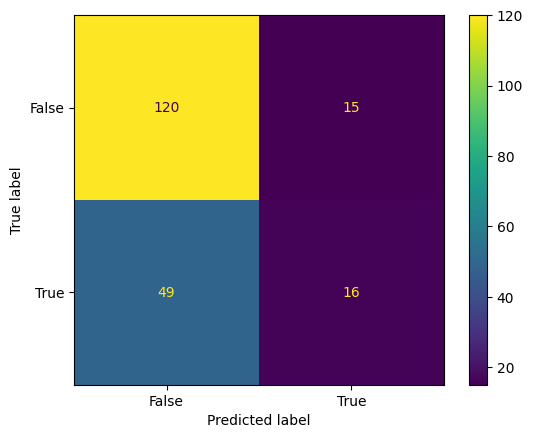

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
myconfusionmatrix_cat = confusion_matrix(y_test_cat, yhat_test_cat)
print('confusion matrix for categorical naive bayes model')
display(myconfusionmatrix_cat)

mycmdisp_cat = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix_cat, display_labels=model_cat.classes_)
mycmdisp_cat.plot()

confusion matrix for gaussian naive bayes model


array([[130,   5],
       [  0,  65]])

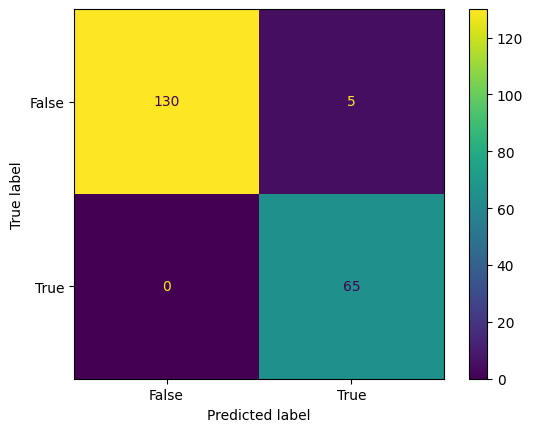

In [ ]:
myconfusionmatrix_num = confusion_matrix(y_test_num, yhat_test_num)
print('confusion matrix for gaussian naive bayes model')
display(myconfusionmatrix_num)

mycmdisp_num = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix_num, display_labels=model_gaus.classes_)
mycmdisp_num.plot()

## Second Model: Neural Net

In [ ]:
df_avg = df.drop(columns=['math score', 'reading score', 'writing score'])
df_avg

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score,passed
0,False,1,4,True,False,72.666667,False
1,False,2,2,True,True,82.333333,True
2,False,1,5,True,False,92.666667,True
3,True,0,3,False,False,49.333333,False
4,True,2,2,True,False,76.333333,True
...,...,...,...,...,...,...,...
995,False,4,5,True,True,94.000000,True
996,True,2,1,False,False,57.333333,False
997,False,2,1,False,True,65.000000,False
998,False,3,2,True,True,74.333333,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_avg.drop(['avg score', 'passed'], axis=1), df_avg['passed'], test_size=0.2, random_state=21)


from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 5))
classifier.add(Dense(units = 8, activation = 'tanh'))
classifier.add(Dense(units = 6, activation = 'linear'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
classifier.fit(X_train.astype(float), y_train, batch_size = 1, epochs = 10)

Epoch 1/10
800/800 [==============================] - 1s 819us/step - loss: 0.6373
Epoch 2/10
800/800 [==============================] - 1s 801us/step - loss: 0.6071
Epoch 3/10
800/800 [==============================] - 1s 831us/step - loss: 0.5945
Epoch 4/10
800/800 [==============================] - 1s 846us/step - loss: 0.5958
Epoch 5/10
800/800 [==============================] - 1s 802us/step - loss: 0.5945
Epoch 6/10
800/800 [==============================] - 1s 830us/step - loss: 0.5891
Epoch 7/10
800/800 [==============================] - 1s 805us/step - loss: 0.5890
Epoch 8/10
800/800 [==============================] - 1s 803us/step - loss: 0.5895
Epoch 9/10
800/800 [==============================] - 1s 803us/step - loss: 0.5875
Epoch 10/10
800/800 [==============================] - 1s 800us/step - loss: 0.5878


In [ ]:
yhat_test = classifier.predict(X_test.astype(float))
yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yhat_test

7/7 [==============================] - 0s 890us/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [ ]:
yy_test = y_test.astype(int).reset_index(drop = True)
yy_test

0      1
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    0
199    0
Name: passed, Length: 200, dtype: int64

In [ ]:
pd.Series(yhat_test)

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    1
197    0
198    0
199    0
Length: 200, dtype: int64

In [ ]:
#(i and j) or (not (i or j))
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [ ]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf

,yhat_test,y_test,correct
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
195,0,0,1
196,1,0,0
197,0,1,0
198,0,0,1


In [ ]:
testdf.correct.sum()

146

In [ ]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))

Total 200
Correct 146
Wrong 54


array([[134,  11],
       [ 43,  12]])

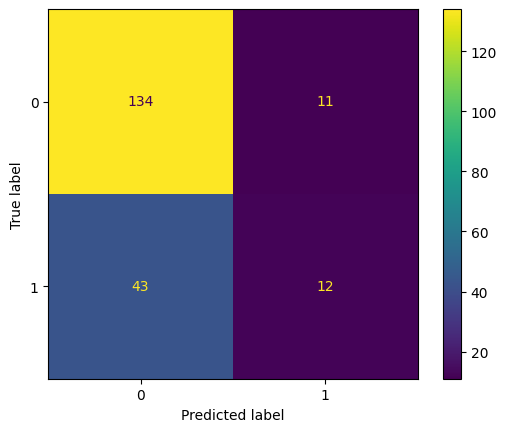

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat_test)
display(myconfusionmatrix)

mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix)
mycmdisp.plot()

In [ ]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print('testing classification report')
print(classification_report(y_test, yhat_test))

print('training classification report')
yhat_train = classifier.predict(X_train)
print(classification_report(y_train, yhat_train))



              precision    recall  f1-score   support

       False       0.76      0.92      0.83       145
        True       0.52      0.22      0.31        55

    accuracy                           0.73       200
   macro avg       0.64      0.57      0.57       200
weighted avg       0.69      0.73      0.69       200



In [ ]:
# testing
print('totals for testing set')
print(f'total positive for testing: {np.count_nonzero(yhat_test)}')
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = np.array(y_test)
print(f'TP: {np.count_nonzero(testdf.apply(lambda i: TP(i.yhat_test, i.y_test), axis=1))}')
print(f'TN: {np.count_nonzero(testdf.apply(lambda i: TN(i.yhat_test, i.y_test), axis=1))}')

# training
print('totals for training set')
print(f'total positive for training: {np.count_nonzero(yhat_train)}')
traindf = pd.DataFrame()
traindf['yhat_train'] = yhat_train
traindf['y_train'] = np.array(y_train)
print(f'TP: {np.count_nonzero(traindf.apply(lambda i: TP(i.yhat_train, i.y_train), axis=1))}')
print(f'TN: {np.count_nonzero(traindf.apply(lambda i: TN(i.yhat_train, i.y_train), axis=1))}')